In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import json
import pickle

# Our generated code
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
%load_ext autoreload
%autoreload 2
    
import libs.exploring as explore
import libs.visualising as visualize
import libs.cleansing as cleanse

# Explore data using PySpark

Packages I had to install:
    - pip install pyspark_dist_explore
    - pip install plotly
and then restart the Kernel.

In [2]:
# Import data
open_food_facts_csv_file = "./data/en.openfoodfacts.org.products.csv"

# Load list of columns (external file) that are loaded into pyspark
data = []
with open("columns_to_import.txt", "r") as json_data:
    columns_to_import = json.load(json_data)
    columns_to_import


food_facts_pd = pd.read_csv(open_food_facts_csv_file,
                            delimiter="\t",
                            usecols=columns_to_import.keys(),
                            dtype=columns_to_import,
                            index_col='code')

#### Find NaN columns

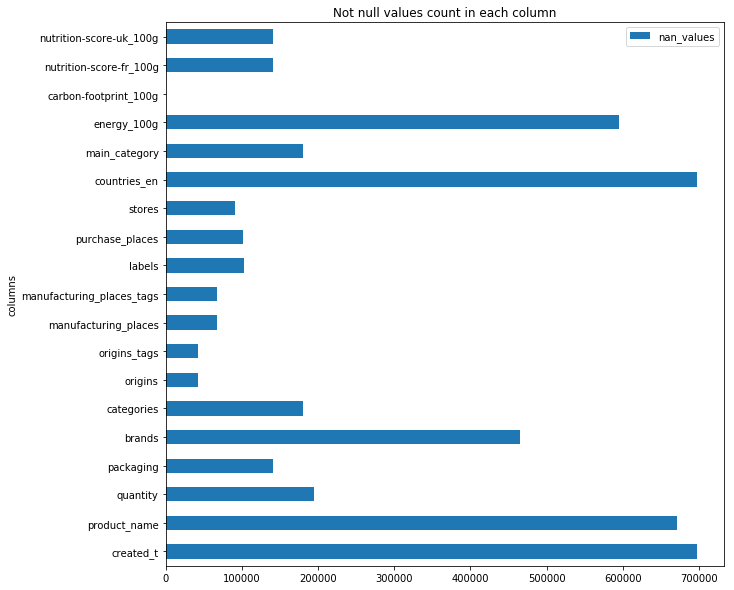

In [3]:
null_entries = pd.DataFrame({'columns' : food_facts_pd.columns,
                             'nan_values' : [food_facts_pd[c].count() for c in food_facts_pd]
                            })

# Plot NaNs counts
null_entries.set_index('columns').plot(kind='barh', figsize=(10, 10))
plt.title("Not null values count in each column")
plt.show()

This number is way too low. We need to find a way to deal with incomplete data or a way to complete it.

# Data cleansing
Guys, the country tags in this dataset are a mess. They differ in language, typesetting, everything. I am trying to clean them up, but I could not find an automated way to assign the correct country tags. 
This is why I've started a list with correct mappings in the countries_replacement.json file, which is still incomplete and I need your help to complete this list. Take a look at it, I think it is self-explaining.

### Unitize tags


In [4]:
food_facts_pd = food_facts_pd.dropna(subset=['product_name', 'countries_en', 'stores'])

In [5]:
food_facts_pd = food_facts_pd.fillna("")
food_facts_pd

,created_t,product_name,quantity,packaging,brands,categories,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,purchase_places,stores,countries_en,main_category,energy_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,,
0000000274722,1514659309,Blanquette de Volaille et son Riz,,"carton,plastique",Comme J’aime,"Plats préparés,Meat-based products,Plats à bas...",France,france,France,france,"Viande Française,Fabriqué en France",France,Comme J'aime,France,en:meals,450,,0,0
0000000290616,1484605978,Salade Cesar,0.980 kg,Frais,Kirkland Signature,Légumes-feuilles,Québec,quebec,Brossard Québec,brossard-quebec,,,Costco,Canada,en:plant-based-foods-and-beverages,1210,,6,6
0000000394710,1484497370,Danoises à la cannelle roulées,1.150 kg,Frais,Kirkland Signature,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries",Québec,quebec,Brossard Québec,brossard-quebec,,Brossard Québec,Costco,Canada,en:sugary-snacks,1520,,,
0000001071894,1409411252,Flute,,"Paper,plastic film",Waitrose,"Plant-based foods and beverages,Plant-based fo...",France,france,United Kingdom,united-kingdom,,"Brent,UK",Waitrose,United Kingdom,en:plant-based-foods-and-beverages,,,,
0000001938067,1484501528,Chaussons tressés aux pommes,1.200 kg,Frais,Kirkland Signature,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries",Québec,quebec,Brossard Québec,brossard-quebec,,Brossard Québec,Costco,Canada,en:sugary-snacks,1090,,9,9
0000004302544,1488464896,Pain Burger Artisan,1.008 kg / 12 pain,"Frais,plastique",Kirkland Signature,Boulange,Québec,quebec,"Brossard,Québec","brossard,quebec",,"Brossard,Québec",Costco,Canada,fr:boulange,1160,,1,1
0000008237798,1491943307,Quiche Lorraine,1 400 kg,Frai,Kirkland Signature,Quiches lorraines,Québec,quebec,"Brossard,Québec","brossard,quebec",,"Brossard,Québec",Costco,Canada,en:meals,478,,2,2
0000008240095,1484342673,Pâté au poulet,1250 kg,Frais,Kirkland Signature,Poulets cuisinés,Québec,quebec,Brossard Québec,brossard-quebec,,Brossard Québec,Costco,Canada,en:meats,751,,,
0000010090206,1370977431,Thé de Noël aromatisé orange-cannelle,75 g,aluminium,Alice Délice,"Aliments et boissons à base de végétaux,Boisso...",,,France,france,,"Lyon,France",Alice Délice,France,en:beverages,,,,


In [129]:
food_facts_pd[['origins', 'manufacturing_places', 'purchase_places', 'countries_en']].head(100)

,origins,manufacturing_places,purchase_places,countries_en
code,,,,
0000000274722,France,France,France,[France]
0000000290616,Québec,Brossard Québec,,[Canada]
0000000394710,Québec,Brossard Québec,Brossard Québec,[Canada]
0000001071894,France,United Kingdom,"Brent,UK",[United Kingdom]
0000001938067,Québec,Brossard Québec,Brossard Québec,[Canada]
0000004302544,Québec,"Brossard,Québec","Brossard,Québec",[Canada]
0000008237798,Québec,"Brossard,Québec","Brossard,Québec",[Canada]
0000008240095,Québec,Brossard Québec,Brossard Québec,[Canada]
0000010090206,,France,"Lyon,France",[France]


In [128]:
copydf = food_facts_pd[['countries_en']].iloc[:100, :]
copydf

,countries_en
code,
0000000274722,[France]
0000000290616,[Canada]
0000000394710,[Canada]
0000001071894,[United Kingdom]
0000001938067,[Canada]
0000004302544,[Canada]
0000008237798,[Canada]
0000008240095,[Canada]
0000010090206,[France]


Note :  
- purchase_places and countries_en are the same though "countries_en" is more complete
-  manufacturing_places and origins are different

In [6]:
# Unitize countries names
with open('country_lookup.json', 'r') as json_data:
    countries_lookup = cleanse.to_lookup(json.load(json_data))
food_facts_pd.countries_en = food_facts_pd.countries_en.apply(lambda x: [countries_lookup[z] for z in x.split(',')])


In [117]:
countries = pd.read_csv('./data/countries.csv')
countries = countries[['name', 'translations']]
countries['alias'] = countries['name']+countries['translations']
countries['name'] = countries['name'].str.split(",", n = 1, expand = True) 
countries = countries[['name', 'alias']]

In [118]:
countries[countries['alias'].str.contains('ireland', case=False)]

,name,alias
80,United Kingdom,"United Kingdom,United Kingdom of Great Britain..."
107,Ireland,"Ireland,Republic of Ireland,Republic of Irelan..."


In [130]:
def country_name_filter(name, countries):
    country_set = countries[countries['alias'].str.contains(name, case=False)]
    if(not country_set.empty):
        if(country_set.shape[0]==1):
            return country_set.iloc[0,0]
        else:
            sub_country_set = country_set[country_set['name'].str.match(name, case=False)]
            if(not sub_country_set.empty):
                return sub_country_set.iloc[0,0]
    else:
        return name

In [131]:
copydf.countries_en = copydf.countries_en.apply(lambda x: [country_name_filter(z, countries) for z in x])
copydf

,countries_en
code,
0000000274722,[France]
0000000290616,[Canada]
0000000394710,[Canada]
0000001071894,[United Kingdom]
0000001938067,[Canada]
0000004302544,[Canada]
0000008237798,[Canada]
0000008240095,[Canada]
0000010090206,[France]


In [7]:
# Unitze labels
with open('taxonomies.json', 'r') as json_data:
    labels_lookup = cleanse.to_lookup(json.load(json_data))
food_facts_pd.labels = food_facts_pd.labels.apply(lambda x: [labels_lookup[z] for z in x.split(',')])

In [8]:
# Store labels
with open('stores_lookup.json', 'r') as json_data:
    stores_lookup = cleanse.to_lookup(json.load(json_data))
food_facts_pd.stores = food_facts_pd.stores.fillna("").apply(lambda x: [stores_lookup[z] for z in x.split(',')])

# Visualize data

In [9]:
# Generate a dataframe that extracts all information required by the web crawler
if 1==1: # skip cell
    products = food_facts_pd

    products.to_pickle("./web_crawler/products_pd.pickle")
    

TypeError: 300.0 is not a string

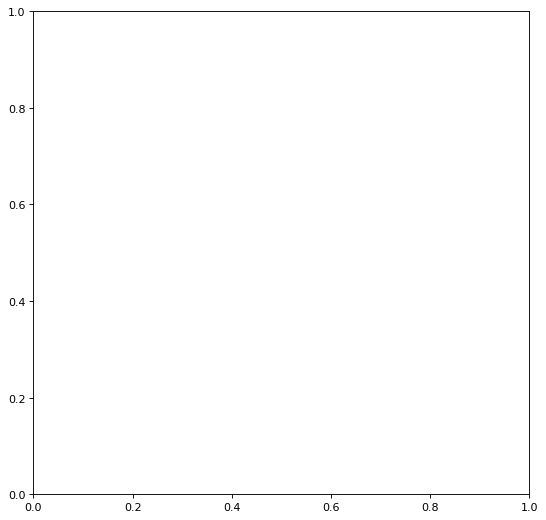

In [10]:
visualize.plot_cluster_by_tags(df=food_facts_pd.dropna(subset=['labels']),
                                 plot2D_features = ["carbon-footprint_100g", "energy_100g"],
                                 cluster="labels")

### Plot distribution of stores where items were bought

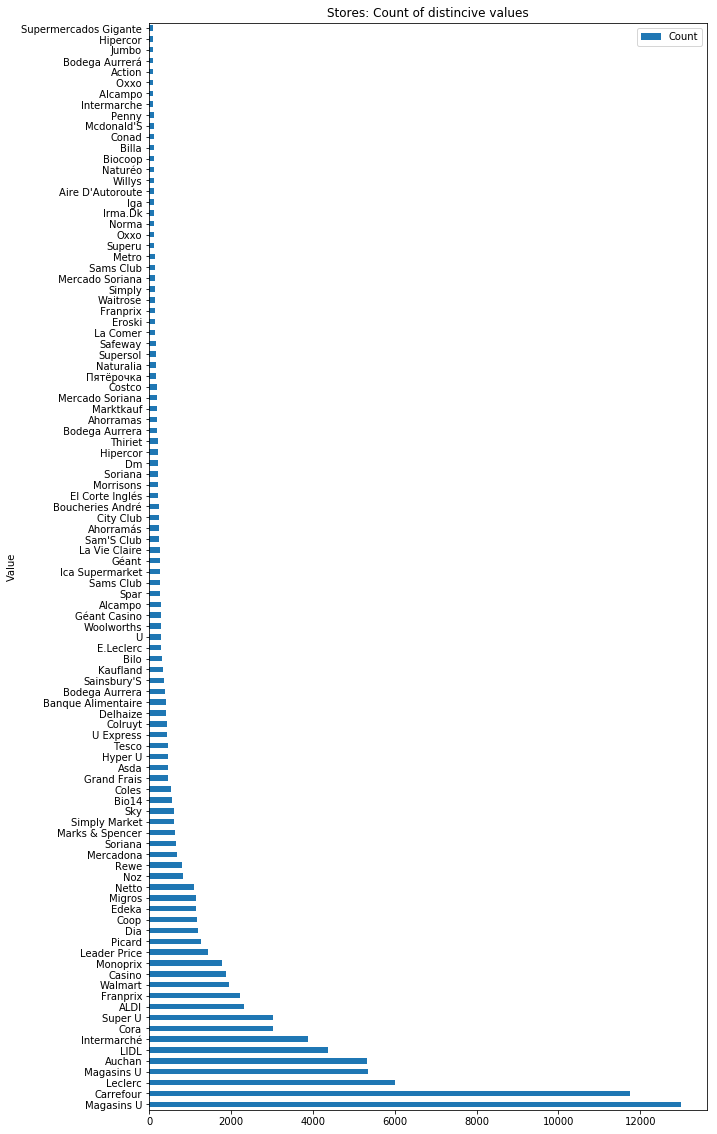

({'',
  'Destock Malin',
  'No Frills',
  'Prim Land',
  'Disneyland',
  'Sarl Segida Eztigar',
  'Bm',
  'Sète',
  'Cbio',
  'Go Sport',
  'Ap-Hp',
  'Gb Carrefour',
  'Fortwenger',
  'Big Lots',
  'Expressu',
  'Cooperative Latte Cisternino',
  'Goasia',
  'Supero',
  'Allyouneedfresh',
  'Naturkost',
  'Superhayat',
  'Aire Du Poulet De Bresse',
  'Carrefourmarket',
  'Ajo',
  'Marjane',
  'Big W',
  ' Rive',
  'Leade Price',
  'Mmm Marktgasse',
  'Dd',
  "Trader'S Joe",
  'Hop !',
  'Le Bon Marché',
  'Castellana',
  'Dhiraj Sons',
  'Ecomax',
  'Coté Nature',
  'Auchans',
  'Cohérence Espace Bio',
  'Geant Casinp',
  'Монетка',
  'Wal- Mart México',
  'Lidl Portugal',
  'Godard',
  'Proxi Super',
  'Pak N Save',
  'Móstoles',
  'Boots',
  'Food & Wine',
  'Biocoop Graine De Bio',
  'Vival Casino',
  'Coop Bio',
  'Okcon 2013',
  'Uno',
  'Les Rigolettes Nantaises',
  'Casino',
  'Walmart Metro',
  'Pharmacie Becker',
  'Biocoop Le Cres',
  'Colruytgroup',
  'Fruitière De Pleure',


In [11]:
visualize.plot_occurences_of_distinct_values(food_facts_pd, 'stores')

### Plot distribution of availability of products in countries

In [ ]:
# Find all distinct countries
countries_set = set()
for index, row in food_facts_pd.iterrows():
    for country in row.countries_en:
        countries_set.add(country)

# Count the number of time each country appear in the dataframe
country_count = dict()
for country in list(countries_set):
    country_count[country] = food_facts_pd.countries_en.apply({country}.issubset).sum()

In [ ]:
country_count_pd = pd.DataFrame(list(country_count.items()), columns=['Country', 'Value'])
country_count_pd['Country'] = country_count_pd['Country'].str.upper()
country_count_pd

In [ ]:
import folium

## Country coordinates for plotting
country_geo = './data/world-countries.json'

map = folium.Map(location=[0, 0], tiles='Mapbox Bright', zoom_start=1.5)

# choropleth maps bind Pandas Data Frames and json geometries.
map.choropleth(geo_data=country_geo,
               data=country_count_pd,
               columns=['Country', 'Value'],
               fill_color='YlGnBu', 
               key_on='feature.id',
               fill_opacity=0.7, 
               line_opacity=0.2,
               )
map

### Plot carbon foot-print histogram over calories

In [ ]:
fig, ax = plt.subplots()

food_facts_pd['energy_100g'] = food_facts_pd['energy_100g'].astype('float')
food_facts_pd['carbon-footprint_100g'] = food_facts_pd['carbon-footprint_100g'].astype('float')

food_facts_pd.plot.scatter(x='energy_100g', 
                           y='carbon-footprint_100g', 
                           c='carbon-footprint_100g', 
                           colormap='coolwarm',
                           ax=ax)
ax.set_facecolor('black')

plt.xlabel('Energy per 100g [kcal]')
plt.show()

### Availability of products per country

# Use the API

Run to get the following command to install the OpenFoodFacts API 
    pip install git+https://github.com/openfoodfacts/openfoodfacts-python